# Aula 1 - Problema e ferramenta

## Aula 1.1 Apresentação

## Aula 1.2 Entendendo o problema


O modelo de recomendação do nosso site não está agradando o público. A recomendação é feita só levando em consideração o gênero.

O que fazer:

- Explorar a base de dados
- Criar um cluster
- utilizar o cluster para criar o novo recomendador

* https://spark.apache.org/docs/latest/api/python/index.html
* https://spark.apache.org/docs/latest/ml-guide.html

## Aula 1.3 Dicionário dos dados

https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features

* `Acousticness/Acústica:` Variável numérica, medida de confiança de 0,0 a 1,0 se a faixa é acústica. 1.0 representa alta confiança de que a faixa é acústica.

* `Danceability/Dançabilidade:` Variável numérica, a dançabilidade descreve o quão adequada uma faixa é para dançar com base em uma combinação de elementos musicais, incluindo tempo, estabilidade do ritmo, força da batida e regularidade geral. Um valor de 0,0 é o menos dançável e 1,0 é o mais dançável.

* `Duration_ms:`Variável numérica, a duração da trilha em milissegundos.

* `Duration_min:` Variável numérica, a duração da faixa em minutos.

* `Energy/Energia:` Variável numérica, Energia é uma medida de 0,0 a 1,0 e representa uma medida perceptiva de intensidade e atividade. Normalmente, as faixas energéticas parecem rápidas, altas e barulhentas. Por exemplo, o death metal tem alta energia, enquanto um prelúdio de Bach tem uma pontuação baixa na escala. As características perceptivas que contribuem para este atributo incluem faixa dinâmica, intensidade percebida, timbre, taxa de início e entropia geral.

* `Explicit/Explícito:` Variável categórica, se a faixa tem ou não letras explícitas (verdadeiro = sim (1); falso = não(0), não OU desconhecido).

* `Id:` O ID do Spotify para a faixa.

* `Instrumentalness/Instrumentalidade:` Variável numérica, prevê se uma faixa não contém vocais. Os sons “Ooh” e “aah” são tratados como instrumentais neste contexto. Faixas de rap ou de palavras faladas são claramente “vocais”. Quanto mais próximo o valor de instrumentalidade estiver de 1,0, maior a probabilidade de a faixa não conter conteúdo vocal. Valores acima de 0,5 destinam-se a representar faixas instrumentais, mas a confiança é maior à medida que o valor se aproxima de 1,0.

* `Key/Chave:`Variável numérica, a chave geral estimada da faixa. Os inteiros são mapeados para pitchs usando a notação padrão de Pitch Class. Por exemplo. 0 = C, 1 = C#/Db, 2 = D, e assim por diante. Se nenhuma chave foi detectada, o valor é -1.

* `Liveness/ Ao vivo:` Variável numérica, detecta a presença de um público na gravação. Valores mais altos de vivacidade representam uma probabilidade maior de que a faixa tenha sido executada ao vivo. Um valor acima de 0,8 fornece uma forte probabilidade de que a faixa esteja ativa.

* `Loudness/ Volume em dB:` Variável numérica, volume geral de uma faixa em decibéis (dB). Os valores de volume são calculados em média em toda a faixa e são úteis para comparar o volume relativo das faixas. A sonoridade é a qualidade de um som que é o principal correlato psicológico da força física (amplitude). Os valores típicos variam entre -60 e 0 db.

* `Mode/ Modo:` Variável numérica, o modo indica a modalidade (maior ou menor) de uma faixa, o tipo de escala da qual seu conteúdo melódico é derivado. Maior é representado por 1 e menor é 0.

* `Popularity/Popularidade:` Variável numérica, a popularidade de uma faixa é um valor entre 0 e 100, sendo 100 o mais popular. A popularidade é calculada por algoritmo e é baseada, em grande parte, no número total de execuções que a faixa teve e quão recentes são essas execuções.

* `Speechiness/Fala:` Variável numérica, a fala detecta a presença de palavras faladas em uma faixa. Quanto mais exclusivamente falada a gravação (por exemplo, talk show, audiolivro, poesia), mais próximo de 1,0 o valor do atributo. Valores acima de 0,66 descrevem faixas que provavelmente são feitas inteiramente de palavras faladas. Valores entre 0,33 e 0,66 descrevem faixas que podem conter música e fala, seja em seções ou em camadas, incluindo casos como música rap. Os valores abaixo de 0,33 provavelmente representam músicas e outras faixas que não são de fala.

* `Tempo:` Variável numérica, Tempo estimado geral de uma faixa em batidas por minuto (BPM). Na terminologia musical, tempo é a velocidade ou ritmo de uma determinada peça e deriva diretamente da duração média da batida.

* `Valence/Valência:` Variável numérica, Medida de 0,0 a 1,0 descrevendo a positividade musical transmitida por uma faixa. Faixas com alta valência soam mais positivas (por exemplo, feliz, alegre, eufórica), enquanto faixas com baixa valência soam mais negativas (por exemplo, triste, deprimida, irritada).

* `Year/Ano:` Ano em que a música foi lançada.

## Aula 1.4 Instalando o PySpark

In [120]:
!pip install pyspark

Importando a Classe SparkSession que é por onde vamos interagir com o Spark

In [121]:
from pyspark.sql import SparkSession

Criando a sessão Spark, aqui podemos verificar a versão que estamos utilizando e o nome da nossa App Spark

In [122]:
spark = SparkSession.builder\
                           .appName("Recomendador PySpark")\
                           .getOrCreate()
spark

# Aula 2 - Leitura e análise dos dados

## Aula 2.1 Leitura dos dados

In [123]:
from pyspark import SparkFiles

In [124]:
# Montar um drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [125]:
#url_dados = 'https://github.com/IgorNascAlves/dados/blob/main/dados_musicas.csv?raw=true'
#sessao_spark.sparkContext.addFile(url_dados)
#path_dados_file = 'file://' + SparkFiles.get('dados_musicas.csv')
# dados = sessao_spark.read.csv(path_dados_file, header=True, sep=';')

In [126]:
# Ler os dados
path = '/content/drive/MyDrive/Colab Notebooks/FORMACAO APACHE SPARK - ALURA/5 - SISTEMA DE RECOMENDACAO/dados_musicas.csv'
# caminho | separador | cabeçalho | deduzir os tipos de cada coluna
dados = spark.read.csv(path, sep = ';', header=True, inferSchema=True)

In [127]:
dados.show()

+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|           valence|year|acousticness|       artists|      danceability|duration_ms|            energy|explicit|                  id|    instrumentalness|key|liveness|           loudness|mode|                name|popularity|speechiness|             tempo|        artists_song|
+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|             0.285|2000|     0.00239|      Coldplay|             0.429|     266773|0.6609999999999999|       0|3AJwUDP919kvQ9Qco...|             1.21E-4| 11|   0.234|  

In [128]:
dados.printSchema()

root
 |-- valence: double (nullable = true)
 |-- year: integer (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- artists: string (nullable = true)
 |-- danceability: double (nullable = true)
 |-- duration_ms: integer (nullable = true)
 |-- energy: double (nullable = true)
 |-- explicit: integer (nullable = true)
 |-- id: string (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- key: integer (nullable = true)
 |-- liveness: double (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- popularity: integer (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- artists_song: string (nullable = true)



In [129]:
dados.count()

20311

In [130]:
len(dados.columns)

19

In [131]:
import pyspark.sql.functions as f

In [132]:
# Avaliar dados nulos
# para cada coluna dentro da lista de colunas, conte:
# quando a coluna tiver valores nulos entenda como 1 (True),
# renomeie a query (f.count(f.when(f.isnull(c), 1))) com o nome da coluna
dados.select([f.count(f.when(f.isnull(c), 1)).alias(c) for c in dados.columns]).show()
# nenhum valor nulo = nada a tratar

+-------+----+------------+-------+------------+-----------+------+--------+---+----------------+---+--------+--------+----+----+----------+-----------+-----+------------+
|valence|year|acousticness|artists|danceability|duration_ms|energy|explicit| id|instrumentalness|key|liveness|loudness|mode|name|popularity|speechiness|tempo|artists_song|
+-------+----+------------+-------+------------+-----------+------+--------+---+----------------+---+--------+--------+----+----+----------+-----------+-----+------------+
|      0|   0|           0|      0|           0|          0|     0|       0|  0|               0|  0|       0|       0|   0|   0|         0|          0|    0|           0|
+-------+----+------------+-------+------------+-----------+------+--------+---+----------------+---+--------+--------+----+----+----------+-----------+-----+------------+



In [133]:
# distinct() busca só os valores distintos (unicos), idem value_counts do pandas
# collect() busca os valores das linhas no formato [Row(coluna = valor1), Row(coluna = valor2), Row(coluna = valor3)]
dados.select('year').distinct().collect()

# sorted() ordena os dados
print(sorted(dados.select('year').distinct().collect()))

[Row(year=2000), Row(year=2001), Row(year=2002), Row(year=2003), Row(year=2004), Row(year=2005), Row(year=2006), Row(year=2007), Row(year=2008), Row(year=2009), Row(year=2010), Row(year=2011), Row(year=2012), Row(year=2013), Row(year=2014), Row(year=2015), Row(year=2016), Row(year=2017), Row(year=2018), Row(year=2019), Row(year=2020)]


## Aula 2.2 - Análise dos dados

In [134]:
# url_anos_dados = 'https://github.com/IgorNascAlves/dados/blob/main/dados_musicas_ano.csv?raw=true'
# sessao_spark.sparkContext.addFile(url_anos_dados)
# path_dados_file = 'file://' + SparkFiles.get('dados_musicas_ano.csv')
# dados_anos = sessao_spark.read.csv(path_dados_file, header=True, inferSchema=True)

In [135]:
path_anos = '/content/drive/MyDrive/Colab Notebooks/FORMACAO APACHE SPARK - ALURA/5 - SISTEMA DE RECOMENDACAO/dados_musicas_ano.csv'
dados_anos = spark.read.csv(path_anos, header=True, inferSchema=True)

In [136]:
dados_anos.show()

+----+----+------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+---+
|mode|year|      acousticness|       danceability|       duration_ms|             energy|   instrumentalness|           liveness|           loudness|        speechiness|             tempo|            valence|         popularity|key|
+----+----+------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+---+
|   1|1921|0.8868960000000005| 0.4185973333333336|260537.16666666663|0.23181513333333334|0.34487805886666656|            0.20571| -17.04866666666665|           0.073662|101.53149333333329|0.37932666666666665| 0.6533333333333333|  2|
|   1|1922|0.9385915492957748| 0.4820422535211267|165469.74647887325

In [137]:
# filtrar o banco de dados. Reduzir os dados a musicas a partir dos anos 2000
dados_anos = dados_anos.filter('year >= 2000')
dados_anos.show()

+----+----+-------------------+------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+---+
|mode|year|       acousticness|      danceability|       duration_ms|            energy|   instrumentalness|           liveness|           loudness|        speechiness|             tempo|           valence|        popularity|key|
+----+----+-------------------+------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+---+
|   1|2000|0.28932270051635994| 0.590918047034764| 242724.6426380368|0.6254128323108387|0.10116776879345596| 0.1976860429447853| -8.247765848670758|0.08920541922290394| 118.9993231083843|0.5594754601226991|  46.6840490797546|  7|
|   1|2001| 0.2868424748428934|0.5833178553615969|240307.79600997505|0.626985522

In [138]:
dados_anos.count()

21

In [139]:
len(dados_anos.columns)

14

##### Trabalhar com o toPandas
Como temos poucos dados, podemos trabalhar com o toPandas.
Será possível utilizar recursos gráficos que o pyspark não possui

[Documentação do ToPandas](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.DataFrame.toPandas.html)

ToPandas vai pegar todos os dados e trazer para um nó.                  
No caso de muitos dados essa característica vai bugar o sistema por estouro de memória

In [140]:
import plotly.express as px

# criar grafico de linhas
fig = px.line(dados_anos.toPandas(), x='year', y='loudness', markers=True, title='Variação do loudness conforme os anos')
fig.show()

In [141]:
import plotly.graph_objects as go

fig = go.Figure()

# df temporário no formato pandas
temp = dados_anos.toPandas()

# adicionar um vestígio (informação)
# gráfico scatter para dados acousticness
fig.add_trace(go.Scatter(x=temp['year'], y=temp['acousticness'], name='Acousticness'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['valence'],
                    name='Valence'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['danceability'],
                    name='Danceability'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['energy'],
                    name='Energy'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['instrumentalness'],
                    name='Instrumentalness'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['liveness'],
                    name='Liveness'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['speechiness'],
                    name='Speechiness'))

fig.show()

## Aula 2.3 Matriz de correlação

In [142]:
# corr() grafico de correlação | text_auto configuração automática dos textos
fig = px.imshow(temp.corr(), text_auto=True)
fig.show()

In [143]:
# coluna mode não está conseguindo calcular, eliminar ela
# para dropar precisa fazer isso antes de transformar em toPandas
fig = px.imshow(dados_anos.drop('mode').toPandas().corr(), text_auto=True)
fig.show()

# Aula 3 - Clusterização por gênero

## Aula 3.1 PCA e StandartScaler

In [144]:
#url_dados_generos = 'https://github.com/IgorNascAlves/dados/blob/main/dados_musicas_genero.csv?raw=true'
#sessao_spark.sparkContext.addFile(url_dados_generos)
#path_dados_file = "file://" + SparkFiles.get("dados_musicas_genero.csv")
#dados_generos = sessao_spark.read.csv(path_dados_file, header=True, inferSchema= True)

In [145]:
path_generos = '/content/drive/MyDrive/Colab Notebooks/FORMACAO APACHE SPARK - ALURA/5 - SISTEMA DE RECOMENDACAO/dados_musicas_genero.csv'
dados_generos = spark.read.csv(path_generos, header=True, inferSchema=True)

In [146]:
dados_generos.show()

+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+
|mode|              genres|       acousticness|       danceability|       duration_ms|             energy|    instrumentalness|           liveness|           loudness|         speechiness|             tempo|            valence|        popularity|key|
+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+
|   1|21st century clas...| 0.9793333333333332|0.16288333333333335|160297.66666666663|0.07131666666666665|          0.60683367|             0.3616|-31.514333333333337| 0.04056666666666667|           75.3365|0.10378333333333334| 27.83333333333333| 

In [147]:
dados_generos.count()

2973

In [148]:
dados_generos.select('genres').distinct().count()
# significa que cada gênero está representado em uma linha

2973

In [149]:
len(dados_generos.columns)

14

A partir desse ponto começa o preparo dos dados

As colunas são interpretadas como dimensões. É impossível visualizar mais que 3 dimensões. Portanto é preciso reduzir n colunas para até 3(causa perda de informações)

Tecnica PCA - técnica de redução do número de colunas para apenas 2. Esta técnica é sensível à escalas dos dados

StandartScaler - ajusta uma escala em comum entre colunas para não atrapalhar o modelo

In [150]:
from pyspark.ml.feature import VectorAssembler

In [151]:
# features
X = dados_generos.columns
X.remove('genres')
X

['mode',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence',
 'popularity',
 'key']

In [152]:
# dados vetorizados = gerador de vetores | aplica aos dados | seleciona as colunas features e genres
dados_generos_vector = VectorAssembler(inputCols=X, outputCol='features').transform(dados_generos).select(['features', 'genres'])

In [153]:
dados_generos_vector.show(5)

+--------------------+--------------------+
|            features|              genres|
+--------------------+--------------------+
|[1.0,0.9793333333...|21st century clas...|
|[1.0,0.49478,0.29...|               432hz|
|[1.0,0.762,0.7120...|               8-bit|
|[1.0,0.6514170195...|                  []|
|[1.0,0.6765573049...|          a cappella|
+--------------------+--------------------+
only showing top 5 rows



In [154]:
from pyspark.ml.feature import StandardScaler

In [155]:
# gerador de escala
scaler = StandardScaler(inputCol='features', outputCol='scaled_features')
# modelo ajustado aos dados vetorizados
scaler_model = scaler.fit(dados_generos_vector)
# dados escalados = aplicar o modelo aos dados vetorizados
dados_generos_scaler = scaler_model.transform(dados_generos_vector)

In [156]:
dados_generos_scaler.show()

+--------------------+--------------------+--------------------+
|            features|              genres|     scaled_features|
+--------------------+--------------------+--------------------+
|[1.0,0.9793333333...|21st century clas...|[2.68174831000279...|
|[1.0,0.49478,0.29...|               432hz|[2.68174831000279...|
|[1.0,0.762,0.7120...|               8-bit|[2.68174831000279...|
|[1.0,0.6514170195...|                  []|[2.68174831000279...|
|[1.0,0.6765573049...|          a cappella|[2.68174831000279...|
|[1.0,0.45921,0.51...|            abstract|[2.68174831000279...|
|[1.0,0.3421466666...|      abstract beats|[2.68174831000279...|
|[1.0,0.2438540633...|    abstract hip hop|[2.68174831000279...|
|[0.0,0.3229999999...|           accordeon|[0.0,1.0101313736...|
|[1.0,0.446125,0.6...|           accordion|[2.68174831000279...|
|[0.0,0.0679505384...|          acid house|[0.0,0.2125045534...|
|[1.0,0.2569145079...|           acid rock|[2.68174831000279...|
|[1.0,0.00683,0.66...|   

## Aula 3.2 PCA

In [157]:
from pyspark.ml.feature import PCA

In [158]:
# criador de PCA. define em quantas dimensões as features serão representadas
pca = PCA(k=2, inputCol='scaled_features', outputCol='pca_features')
# modelo ajustado aos dados escalados
model_pca = pca.fit(dados_generos_scaler)
# dados PCA = aplicar o modelo aos dados escalados
dados_generos_pca = model_pca.transform(dados_generos_scaler)

In [159]:
dados_generos_pca.select('pca_features').show(truncate=False)

+------------------------------------------+
|pca_features                              |
+------------------------------------------+
|[-2.5070953668885663,-0.43816913737698293]|
|[0.596967905663348,-4.981612052751353]    |
|[4.158460276223559,0.83665250810799]      |
|[2.3873448785122156,0.4877989015663361]   |
|[2.650121837167907,0.575681976882043]     |
|[1.4965091203367622,-1.8644183183717828]  |
|[3.9235207721573224,-0.28518350023528705] |
|[4.611011109831113,0.6783790472312338]    |
|[2.8376900630842288,0.57129937165805]     |
|[2.706690139892782,1.2593788079708255]    |
|[4.698331383924286,-1.2765569680619455]   |
|[3.375987496679866,-0.7560741064307498]   |
|[5.608998877066019,-1.042731164439324]    |
|[-0.2954946352117699,0.2763864586236268]  |
|[2.572559106287041,1.3169815431109746]    |
|[3.400822802049343,-0.5073029625781936]   |
|[4.366720316263417,0.33648270597710517]   |
|[2.7254698167723985,-0.5058604987046403]  |
|[4.958112358381603,-1.2627579957290722]   |
|[3.693495

In [160]:
from pyspark.ml import Pipeline

In [161]:
# um único pipeline para salvar todas as estratégias de transformação de dados

pca_pipeline = Pipeline(stages=[VectorAssembler(inputCols=X, outputCol='features'),
                                StandardScaler(inputCol='features', outputCol='scaled_features'),
                                PCA(k=2, inputCol='scaled_features', outputCol='pca_features')])

In [162]:
pca_pipeline_model = pca_pipeline.fit(dados_generos)

In [163]:
dados_generos_pca = pca_pipeline_model.transform(dados_generos)

In [164]:
dados_generos_pca.show()

+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+--------------------+--------------------+--------------------+
|mode|              genres|       acousticness|       danceability|       duration_ms|             energy|    instrumentalness|           liveness|           loudness|         speechiness|             tempo|            valence|        popularity|key|            features|     scaled_features|        pca_features|
+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+--------------------+--------------------+--------------------+
|   1|21st century clas...| 0.9793333333333332|0.162883333

In [165]:
dados_generos_pca.select('pca_features').show(truncate=False)

+------------------------------------------+
|pca_features                              |
+------------------------------------------+
|[-2.5070953668885663,-0.43816913737698293]|
|[0.596967905663348,-4.981612052751353]    |
|[4.158460276223559,0.83665250810799]      |
|[2.3873448785122156,0.4877989015663361]   |
|[2.650121837167907,0.575681976882043]     |
|[1.4965091203367622,-1.8644183183717828]  |
|[3.9235207721573224,-0.28518350023528705] |
|[4.611011109831113,0.6783790472312338]    |
|[2.8376900630842288,0.57129937165805]     |
|[2.706690139892782,1.2593788079708255]    |
|[4.698331383924286,-1.2765569680619455]   |
|[3.375987496679866,-0.7560741064307498]   |
|[5.608998877066019,-1.042731164439324]    |
|[-0.2954946352117699,0.2763864586236268]  |
|[2.572559106287041,1.3169815431109746]    |
|[3.400822802049343,-0.5073029625781936]   |
|[4.366720316263417,0.33648270597710517]   |
|[2.7254698167723985,-0.5058604987046403]  |
|[4.958112358381603,-1.2627579957290722]   |
|[3.693495

## Aula 3.3 K-Means

https://user.ceng.metu.edu.tr/~akifakkus/courses/ceng574/k-means/

In [166]:
# kmeans é um simulador de agrupamento(clustering).
# definir o número de grupos para a simulação
from pyspark.ml.clustering import KMeans

In [167]:
SEED = 1224

In [168]:
# simulador de clustering com definição de número de grupos
kmeans = KMeans(featuresCol='pca_features', predictionCol='cluster_pca').setK(5).setSeed(SEED)

In [169]:
# modelo ajustado aos dados pca
model_kmeans = kmeans.fit(dados_generos_pca)

In [170]:
# novo df = aplicação do modelo com os dados pca
predictions_kmeans = model_kmeans.transform(dados_generos_pca)

In [171]:
predictions_kmeans.select('pca_features', 'cluster_pca').show(truncate=False)

+------------------------------------------+-----------+
|pca_features                              |cluster_pca|
+------------------------------------------+-----------+
|[-2.5070953668885663,-0.43816913737698293]|2          |
|[0.596967905663348,-4.981612052751353]    |2          |
|[4.158460276223559,0.83665250810799]      |4          |
|[2.3873448785122156,0.4877989015663361]   |0          |
|[2.650121837167907,0.575681976882043]     |0          |
|[1.4965091203367622,-1.8644183183717828]  |2          |
|[3.9235207721573224,-0.28518350023528705] |4          |
|[4.611011109831113,0.6783790472312338]    |1          |
|[2.8376900630842288,0.57129937165805]     |4          |
|[2.706690139892782,1.2593788079708255]    |0          |
|[4.698331383924286,-1.2765569680619455]   |3          |
|[3.375987496679866,-0.7560741064307498]   |4          |
|[5.608998877066019,-1.042731164439324]    |1          |
|[-0.2954946352117699,0.2763864586236268]  |2          |
|[2.572559106287041,1.316981543

## Aula 3.4 Plotando a clustering

In [172]:
from pyspark.ml.functions import vector_to_array

In [173]:
# dividir os dados vetorizados de pca_features em x e y
# selecionar as colunas que serão salvas no novo df
pca_features_xy = predictions_kmeans.withColumn('x', vector_to_array('pca_features')[0])\
                .withColumn('y', vector_to_array('pca_features')[1])\
                .select(['x', 'y', 'cluster_pca', 'genres'])

In [174]:
pca_features_xy.show()

+-------------------+--------------------+-----------+--------------------+
|                  x|                   y|cluster_pca|              genres|
+-------------------+--------------------+-----------+--------------------+
|-2.5070953668885663|-0.43816913737698293|          2|21st century clas...|
|  0.596967905663348|  -4.981612052751353|          2|               432hz|
|  4.158460276223559|    0.83665250810799|          4|               8-bit|
| 2.3873448785122156|  0.4877989015663361|          0|                  []|
|  2.650121837167907|   0.575681976882043|          0|          a cappella|
| 1.4965091203367622| -1.8644183183717828|          2|            abstract|
| 3.9235207721573224|-0.28518350023528705|          4|      abstract beats|
|  4.611011109831113|  0.6783790472312338|          1|    abstract hip hop|
| 2.8376900630842288|    0.57129937165805|          4|           accordeon|
|  2.706690139892782|  1.2593788079708255|          0|           accordion|
|  4.6983313

In [175]:
# x | y | cor do ponto de interseção de x e y | quadro de dados flutuantes = x, y, cluster_pca
fig = px.scatter(pca_features_xy.toPandas(), x='x', y='y', color='cluster_pca', hover_data=['x', 'y', 'genres'])
fig.show()
# os grupos deveriam ter ficado mais afastados

In [176]:
# Quanto de variância a etapa PCA_model explica das colunas (x explica 3 colunas e y explica 1 coluna de 19)
# Está explicando (4 features apenas estão sendo classificadas por esse pipeline, de 19 features iniciais)muito pouco,
# portanto teremos que continuar tentando pois essa não foi uma solução ideal
pca_pipeline_model.stages[2].explainedVariance

DenseVector([0.2975, 0.1212])

# Aula 4 - Clusterização por música

## Aula 4.1 Redução de dimensionalidade com PCA

In [177]:
dados.show()

+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|           valence|year|acousticness|       artists|      danceability|duration_ms|            energy|explicit|                  id|    instrumentalness|key|liveness|           loudness|mode|                name|popularity|speechiness|             tempo|        artists_song|
+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|             0.285|2000|     0.00239|      Coldplay|             0.429|     266773|0.6609999999999999|       0|3AJwUDP919kvQ9Qco...|             1.21E-4| 11|   0.234|  

In [178]:
X = dados.columns
X.remove('artists')
X.remove('id')
X.remove('name')
X.remove('artists_song')
X

['valence',
 'year',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'explicit',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'popularity',
 'speechiness',
 'tempo']

In [179]:
dados_encoded_vector = VectorAssembler(inputCols=X, outputCol='features').transform(dados)

In [180]:
dados_encoded_vector.select('features').show(truncate=False, n=5)

+-------------------------------------------------------------------------------------------------------------------------+
|features                                                                                                                 |
+-------------------------------------------------------------------------------------------------------------------------+
|[0.285,2000.0,0.00239,0.429,266773.0,0.6609999999999999,0.0,1.21E-4,11.0,0.234,-7.227,1.0,84.0,0.0281,173.372]           |
|[0.613,2000.0,0.143,0.843,270507.0,0.8059999999999999,1.0,0.0,4.0,0.0771,-5.9460000000000015,0.0,80.0,0.269,94.948]      |
|[0.4,2000.0,0.00958,0.556,216880.0,0.8640000000000001,0.0,0.0,3.0,0.209,-5.87,0.0,84.0,0.0584,105.143]                   |
|[0.5429999999999999,2000.0,0.00664,0.545,233933.0,0.865,0.0,1.1E-5,11.0,0.168,-5.7079999999999975,0.0,78.0,0.0286,99.009]|
|[0.76,2000.0,0.0302,0.949,284200.0,0.6609999999999999,1.0,0.0,5.0,0.0454,-4.244,0.0,80.0,0.0572,104.504]                 |
+-------

In [181]:
scaler = StandardScaler(inputCol='features', outputCol='features_scaled')
model_scaler = scaler.fit(dados_encoded_vector)
dados_musicas_scaler = model_scaler.transform(dados_encoded_vector)

In [182]:
dados_musicas_scaler.select('features_scaled').show(truncate=False, n=5)

+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|features_scaled                                                                                                                                                                                                                                                               |
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[1.156596679221045,329.8170613984441,0.008403188822334736,2.5040545743834373,3.7858811737298526,2.980511298201045,0.0,6.070790766862789E-4,3.0696424994844875,1.4832857988766257,-1.

In [183]:
# k = numero de componentes.
# Precisa-se maximizar os resultados do recomendador.
# Os componentes precisam explicar o máximo de resultados com o mínimo de componentes (colunas)
k = len(X)
k

# técnica para isso:
# treinar o PCA, fazer ajuste de componentes para o máximo de features
# a partir desse valor determinar o grau de explicação que queremos que ele assuma

15

In [184]:
# gerador de PCA considerando 15 dimensões
pca = PCA(k=k, inputCol='features_scaled', outputCol='pca_features')
model_pca = pca.fit(dados_musicas_scaler)
dados_musicas_pca = model_pca.transform(dados_musicas_scaler)

In [185]:
# Identificar quantos porcento nossos 15 componentes estão explicando os resultados do modelo PCA
sum(model_pca.explainedVariance) * 100

100.00000000000003

In [186]:
# Quantos componentes é preciso para alcançar um nível tal de explicação
# Looping de uma sequencia de k, soma o array de explicação de cada coluna, com índice de 0 à i+1
lista_valores = [sum(model_pca.explainedVariance[0:i+1]) for i in range(k)]
lista_valores

[0.21297354127107349,
 0.3459774162295507,
 0.43989805678254446,
 0.5267820578269103,
 0.6001038103117929,
 0.666571951365239,
 0.7282174213581728,
 0.7845103843321023,
 0.8350002357002614,
 0.8812446547406769,
 0.9151737562703048,
 0.9435370133056039,
 0.9699018569070161,
 0.9900947792885582,
 1.0000000000000002]

In [187]:
import numpy as np

In [188]:
# para explicar 70% dos dados, quantos componentes são necessários?
# soma os valores do array lista_valores até a soma ser menor ou igual a 0.7
k = sum(np.array(lista_valores) <= 0.7)
k

6

In [189]:
# gerar um df PCA com 6 componentes como feature
pca = PCA(k=k, inputCol='features_scaled', outputCol='pca_features')
model_pca = pca.fit(dados_musicas_scaler)
dados_musicas_pca_final = model_pca.transform(dados_musicas_scaler)

In [190]:
dados_musicas_pca_final.select('pca_features').show(truncate=False, n=5)

+----------------------------------------------------------------------------------------------------------------------+
|pca_features                                                                                                          |
+----------------------------------------------------------------------------------------------------------------------+
|[-34.71004464775702,-165.3684878490617,-11.163498729833675,-139.1137428085442,14.152192300931317,-6.254422223810444]  |
|[-36.49885762774904,-167.85185045616547,-10.729023248907904,-135.90435265671286,13.38840189058717,-3.972980727830917] |
|[-35.46030091694054,-165.99633344577876,-11.361290348241944,-138.24276881246985,13.866654919305718,-4.342675920458773]|
|[-35.56301325520582,-165.59515096480598,-11.46022600703173,-137.52095740570027,15.568542803922659,-4.542073725584329] |
|[-36.54556974907565,-167.37512505802474,-11.881276527236897,-136.27798590243967,14.056847990344485,-3.583390145779214]|
+-------------------------------

In [191]:
# calculo da explicação dos dados para o modelo com 6 componentes
sum(model_pca.explainedVariance) *100

66.6571951365239

## Aula 4.2 Aplicação do cluster com K-Means

In [192]:
# gerador de pipeline
pca_pipeline = Pipeline(stages=[VectorAssembler(inputCols=X, outputCol='features'),
                                StandardScaler(inputCol='features', outputCol='features_scaled'),
                                PCA(k=6, inputCol='features_scaled', outputCol='pca_features')])

In [193]:
# modelo ajustado aos dados originais
model_pca_pipeline = pca_pipeline.fit(dados)

In [194]:
# projection = aplica aos dados originais o modelo ajustado
projection = model_pca_pipeline.transform(dados)

In [195]:
projection.select('pca_features').show(truncate=False, n=5)

+----------------------------------------------------------------------------------------------------------------------+
|pca_features                                                                                                          |
+----------------------------------------------------------------------------------------------------------------------+
|[-34.71004464775702,-165.3684878490617,-11.163498729833675,-139.1137428085442,14.152192300931317,-6.254422223810444]  |
|[-36.49885762774904,-167.85185045616547,-10.729023248907904,-135.90435265671286,13.38840189058717,-3.972980727830917] |
|[-35.46030091694054,-165.99633344577876,-11.361290348241944,-138.24276881246985,13.866654919305718,-4.342675920458773]|
|[-35.56301325520582,-165.59515096480598,-11.46022600703173,-137.52095740570027,15.568542803922659,-4.542073725584329] |
|[-36.54556974907565,-167.37512505802474,-11.881276527236897,-136.27798590243967,14.056847990344485,-3.583390145779214]|
+-------------------------------

In [196]:
# gerador de clusters | k= qnt de clusters (grupos)
kmeans = KMeans(k=50, featuresCol='pca_features', predictionCol='cluster_pca', seed=SEED)

In [197]:
# modelo ajustado aos dados vindos do pipeline
modelo_kmeans = kmeans.fit(projection)

In [198]:
# df novo aplicando o modelo aos dados vindos do pipeline
projetion_kmeans = modelo_kmeans.transform(projection)

In [199]:
projetion_kmeans.select(['pca_features','cluster_pca']).show()

+--------------------+-----------+
|        pca_features|cluster_pca|
+--------------------+-----------+
|[-34.710044647757...|          8|
|[-36.498857627749...|          4|
|[-35.460300916940...|         35|
|[-35.563013255205...|         16|
|[-36.545569749075...|         34|
|[-36.713222290262...|         34|
|[-36.013246178822...|         34|
|[-36.542687712104...|         23|
|[-36.425249009784...|         16|
|[-35.872074915770...|         34|
|[-31.639065936568...|         44|
|[-35.661446890546...|         34|
|[-35.574542234850...|         32|
|[-36.022399748656...|         13|
|[-34.336941950985...|         35|
|[-35.096906055142...|         49|
|[-35.202423054032...|         38|
|[-34.942948671026...|         30|
|[-36.617404517517...|          4|
|[-34.296973387410...|          6|
+--------------------+-----------+
only showing top 20 rows



In [200]:
# pca_features possui 6 vetores (equivalente a 6 colunas)
# para plotar umgráfico não podemos usar os 6 componentes, portanto vamos escolher 2 apenas para prosseguir
# dividir o vetor pca_features em coluna x e coluna y
projetion_kmeans = projetion_kmeans.withColumn('x', vector_to_array('pca_features')[0])\
                                   .withColumn('y', vector_to_array('pca_features')[1])

In [201]:
projetion_kmeans.select(['x', 'y', 'cluster_pca', 'artists_song']).show()

+-------------------+-------------------+-----------+--------------------+
|                  x|                  y|cluster_pca|        artists_song|
+-------------------+-------------------+-----------+--------------------+
| -34.71004464775702| -165.3684878490617|          8|   Coldplay - Yellow|
| -36.49885762774904|-167.85185045616547|          4|OutKast - Ms. Jac...|
| -35.46030091694054|-165.99633344577876|         35|Linkin Park - In ...|
| -35.56301325520582|-165.59515096480598|         16|3 Doors Down - Kr...|
| -36.54556974907565|-167.37512505802474|         34|Eminem - The Real...|
|  -36.7132222902623|  -166.482084830997|         34|Disturbed - Down ...|
| -36.01324617882219|-166.63514920955333|         34| Nelly - Ride Wit Me|
| -36.54268771210487| -166.9792823483323|         23|       Eminem - Stan|
|  -36.4252490097843|-165.10535006330755|         16|*NSYNC - Bye Bye Bye|
| -35.87207491577071| -166.0309883824791|         34|Britney Spears - ...|
|-31.639065936568734|-166

## Aula 4.3 Analisando o cluster

In [202]:
fig = px.scatter(projetion_kmeans.toPandas(), x='x', y='y', color='cluster_pca', hover_data=['artists_song'])
fig.show()


# Aula 5 - Sistemas de Recomendação

## Aula 5.1 Distâncias das musicas
Distância Euclidiana

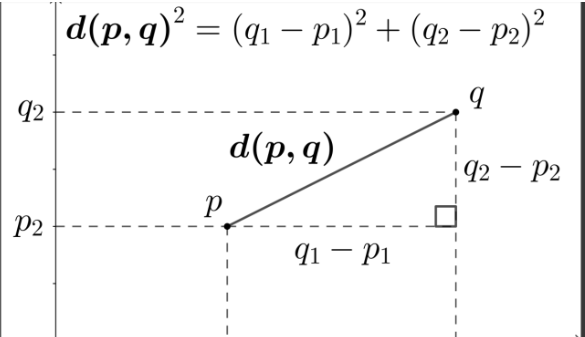

In [203]:
# musica referencia para identificar a distancia entre musicas no mesmo cluster
nome_musica = 'Taylor Swift - Blank Space'

In [204]:
# Identificar a qual cluster a musica referencia pertence
# filtrar o df onde a coluna artista-musica seja igual a musica referencia
# seleciona a coluna cluster_pca e coleta o conteúdo ( [Row(cluster_pca=3)] ) | collect pode buscar n linhas
# collect[0][0], o 1º[0] informa o índice da linha, o 2º [0] informa o ídice da coluna
cluster = projetion_kmeans.filter(projetion_kmeans.artists_song == nome_musica).select('cluster_pca').collect()[0][0]
cluster

3

In [205]:
# df das musicas que pertencem ao mesmo cluster
# df filtrado pela coluna cluster_pca igual a 3. selecione as colunas
musicas_recomendadas = projetion_kmeans.filter(projetion_kmeans.cluster_pca == cluster)\
                                       .select('artists_song', 'id', 'pca_features')
musicas_recomendadas.show()

+--------------------+--------------------+--------------------+
|        artists_song|                  id|        pca_features|
+--------------------+--------------------+--------------------+
|Usher - Yeah! (fe...|5rb9QrpfcKFHM1EUb...|[-36.050436933493...|
|Kelly Clarkson - ...|3xrn9i8zhNZsTtcoW...|[-35.191226411336...|
| Keyshia Cole - Love|0W4NhJhcqKCqEP2GI...|[-34.751332435196...|
|Mariah Carey - We...|3LmvfNUQtglbTryds...|[-35.144610288312...|
|Korn - Coming Undone|6p2liQLGoDaLXgND6...|[-35.272207170621...|
|Chris Brown - Yo ...|7DFnq8FYhHMCylykf...|[-35.112344117719...|
|  Aventura - Un Beso|1SaEt8dwTuLDzenUu...|[-34.134357732463...|
|Chris Brown - Say...|5F7IJrXD6Fa3EmqoY...|[-34.728839526520...|
|Red Hot Chili Pep...|10Nmj3JCNoMeBQ87u...|[-36.101793760083...|
|Craig Morgan - In...|0Ta3jOf8m9yCSWMVw...|[-35.227552248025...|
|Arctic Monkeys - ...|3geFzA6VBSNZUTmV3...|[-34.696049351615...|
|Arctic Monkeys - 505|58ge6dfP91o9oXMzq...|[-35.057671072817...|
|T-Pain - Buy U a ...|2aI

In [206]:
# quais as features da musica referencia
# Lista de features vinda do df anterior filtrado para selecionar apenas a linha da musica referencia.
# seleciona a coluna de features, coleta o conteúdo da linha0 e coluna0
componenetes_musica = musicas_recomendadas.filter(musicas_recomendadas.artists_song == nome_musica)\
                                          .select('pca_features').collect()[0][0]
componenetes_musica

DenseVector([-35.461, -166.9658, -12.7925, -137.9457, 13.1234, -4.1374])

## Aula 5.2 Recomendação da música

In [207]:
from scipy.spatial.distance import euclidean
from pyspark.sql.types import FloatType

In [208]:
# criar função que calcula a distancia entre musicas e a musica referencia
# Função calcula_distance recebe as features da musica analisada
# Função retorna um valor euclidiano entre as features da musica referencia e as features da musica analisada
def calcula_distance(value):
  return euclidean(componenetes_musica, value)

# variável da distância convertida = Função que transforma o valor de retorno de calcula_distance em float
udf_calcula_distance = f.udf(calcula_distance, FloatType())
# df contendo coluna dist = df do cluster 3, cria coluna 'Dist', calcula a distancia em float para coluna features
musicas_recomendadas_dist = musicas_recomendadas.withColumn('Dist', udf_calcula_distance('pca_features'))
# cria novo df a partir do df anterior | ordenando o df anterior pela coluna dist,
# pega só as 10 primeiras linhas, seleciona as colunas artists_song, id, dist
recomendadas = spark.createDataFrame(musicas_recomendadas_dist.sort('Dist').take(10)).select(['artists_song', 'id', 'Dist'])

recomendadas.show()

+--------------------+--------------------+-------------------+
|        artists_song|                  id|               Dist|
+--------------------+--------------------+-------------------+
|Taylor Swift - Bl...|1p80LdxRV74UKvL8g...|                0.0|
|Imagine Dragons -...|4uGY9CqDtGtaTTLg1...|0.37921473383903503|
|The All-American ...|6ihL9TjfRjadfEePz...| 0.6039153933525085|
|Darius Rucker - B...|36ISlLb12gKuCCVTY...| 0.6824935674667358|
|Old Dominion - Sn...|7I5fYc4qKJddht8Oz...| 0.7364036440849304|
|Dan + Shay - Noth...|4W38RXuQNuoTSwVsQ...| 0.7841535210609436|
|Twenty One Pilots...|7qxjGHW485TL8ciwk...| 0.8002141118049622|
|Jon Bellion - Mor...|2JXNOtb0ANe6MzgRY...| 0.8098159432411194|
|Kip Moore - More ...|73WWkaWkIRSP3MYGZ...| 0.8557121753692627|
|Calibre 50 - Corr...|0ehx1p1HMn7NMKisZ...| 0.8788507580757141|
+--------------------+--------------------+-------------------+



In [209]:
# Colocar todas as etapas anteriores numa função só

# função recomendador vai receber a musica referencia
def recomendador(nome_musica):

# valida se a musica consta no banco de dados
  encontra_musica(nome_musica, projetion_kmeans)

# identificar a qual cluster a musica referencia pertence
  cluster = projetion_kmeans.filter(projetion_kmeans.artists_song == nome_musica).select('cluster_pca').collect()[0][0]
# df das musicas pertencentes ao mesmo cluster
  musicas_recomendadas = projetion_kmeans.filter(projetion_kmeans.cluster_pca == cluster)\
                                       .select('artists_song', 'id', 'pca_features')
# df dos features das musicas do cluster
  componenetes_musica = musicas_recomendadas.filter(musicas_recomendadas.artists_song == nome_musica)\
                                          .select('pca_features').collect()[0][0]
# calcula a distancia das musicas para a musica referencia
  def calcula_distance(value):
    return euclidean(componenetes_musica, value)

# converte o retorno da função para float
  udf_calcula_distance = f.udf(calcula_distance, FloatType())
# df incluindo nova coluna com as distancias
  musicas_recomendadas_dist = musicas_recomendadas.withColumn('Dist', udf_calcula_distance('pca_features'))
# cria um df das 10 musicas mais próximas da musica referencia e contendo 3 colunas
  recomendadas = spark.createDataFrame(musicas_recomendadas_dist.sort('Dist').take(10)).select(['artists_song', 'id', 'Dist'])
# mostra os artistas_musica mais próximas da musica referencia
  recomendadas.select('artists_song').show(truncate=False)


In [210]:
# função recebe uma musica e um banco de dados para pesquisar
def encontra_musica(nome_musica, projection):
# filtra o banco de dados para nomes iguais ao da musica e coleta as linhas
    resultado = projection.filter(projection.artists_song == nome_musica).collect()
# se o resultado estiver vazio retorna falso
    if len(resultado) == 0:
      return print('musica inexistente')
    return True

In [211]:
recomendador('Taylor Swift - Blank Space')


+-----------------------------------------+
|artists_song                             |
+-----------------------------------------+
|Taylor Swift - Blank Space               |
|Imagine Dragons - Machine                |
|The All-American Rejects - Gives You Hell|
|Darius Rucker - Beers And Sunshine       |
|Old Dominion - Snapback                  |
|Dan + Shay - Nothin' Like You            |
|Twenty One Pilots - Not Today            |
|Jon Bellion - Morning In America         |
|Kip Moore - More Girls Like You          |
|Calibre 50 - Corrido De Juanito          |
+-----------------------------------------+



## Aula 5.3 Biblioteca Spotipy

In [212]:
!pip install spotipy

In [213]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth, SpotifyClientCredentials

**ATENÇÃO!**

Antes de rodar essa parte do código, você precisa fazer uma conta na API do Spotify e gerar suas próprias **client_id** e **client_secret**

In [214]:
# definição de credenciais para acessar a API do Spotify
scope = "user-library-read playlist-modify-private"
# autorização de acesso
OAuth = SpotifyOAuth(
        scope=scope,
        redirect_uri='http://localhost:5000/callback',
        client_id = '016a9afe00a14f3cb7a4af6fcfb263d9',
        client_secret = 'c6ac43bb7d0d4ec19df100b4efe7aa36')

In [215]:
# criar a credencial de cliente para o gerente do projeto
client_credentials_manager = SpotifyClientCredentials(client_id = '566b010ba65541ebb537ea12f225fee3',
                                                      client_secret = '0d71d1191ca7418d9af15433c6acfd62')

# sp = caminho de interação com o spotify (será usado para fazer requisições)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [216]:
# exemplo de requisição
# id = df filtrado pelo nome da musica e selecionado a coluna id, coleta o dado da linha
id = projetion_kmeans.filter(projetion_kmeans.artists_song == nome_musica).select('id').collect()[0][0]
id

'1p80LdxRV74UKvL8gnD7ky'

In [217]:
# busca informações de um id
sp.track(id)

{'album': {'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/06HL4z0CvFAxyc27GXpf02'},
    'href': 'https://api.spotify.com/v1/artists/06HL4z0CvFAxyc27GXpf02',
    'id': '06HL4z0CvFAxyc27GXpf02',
    'name': 'Taylor Swift',
    'type': 'artist',
    'uri': 'spotify:artist:06HL4z0CvFAxyc27GXpf02'}],
  'available_markets': ['CA', 'US'],
  'external_urls': {'spotify': 'https://open.spotify.com/album/2QJmrSgbdM35R67eoGQo4j'},
  'href': 'https://api.spotify.com/v1/albums/2QJmrSgbdM35R67eoGQo4j',
  'id': '2QJmrSgbdM35R67eoGQo4j',
  'images': [{'height': 640,
    'url': 'https://i.scdn.co/image/ab67616d0000b2739abdf14e6058bd3903686148',
    'width': 640},
   {'height': 300,
    'url': 'https://i.scdn.co/image/ab67616d00001e029abdf14e6058bd3903686148',
    'width': 300},
   {'height': 64,
    'url': 'https://i.scdn.co/image/ab67616d000048519abdf14e6058bd3903686148',
    'width': 64}],
  'name': '1989',
  'release_date': '2014-10-27',
  'release

In [218]:
# extrair informações do spotify para todas as musicas recomendadas

# função anterior editada
def recomendador(nome_musica):

  # Calcula musicas recomendadas
  cluster = projetion_kmeans.filter(projetion_kmeans.artists_song == nome_musica).select('cluster_pca').collect()[0][0]
  musicas_recomendadas = projetion_kmeans.filter(projetion_kmeans.cluster_pca == cluster)\
                                       .select('artists_song', 'id', 'pca_features')
  componenetes_musica = musicas_recomendadas.filter(musicas_recomendadas.artists_song == nome_musica)\
                                          .select('pca_features').collect()[0][0]

  # retorna a distancia das musicas para a musica referencia
  def calcula_distance(value):
    return euclidean(componenetes_musica, value)
  # edita o retorno da função para float
  udf_calcula_distance = f.udf(calcula_distance, FloatType())

  # inclui no df a coluna de distancias
  musicas_recomendadas_dist = musicas_recomendadas.withColumn('Dist', udf_calcula_distance('pca_features'))

  # cria um df de 3 colunas a paertir do df anterior, com as 10 musicas mais proximas da musica referencia
  recomendadas = spark.createDataFrame(musicas_recomendadas_dist.sort('Dist').take(10)).select(['artists_song', 'id', 'Dist'])

  # apresenta as 10 musicas recomendadas
  recomendadas.select('artists_song').show(truncate=False)


  #Pegar informações na API fazendo requisições
  playlist_id = recomendadas.select('id').collect()

  playlist_track = []

  for id in playlist_id:
    playlist_track.append(sp.track(id[0]))

  return len(playlist_track)

In [219]:
recomendador('Taylor Swift - Blank Space')

+-----------------------------------------+
|artists_song                             |
+-----------------------------------------+
|Taylor Swift - Blank Space               |
|Imagine Dragons - Machine                |
|The All-American Rejects - Gives You Hell|
|Darius Rucker - Beers And Sunshine       |
|Old Dominion - Snapback                  |
|Dan + Shay - Nothin' Like You            |
|Twenty One Pilots - Not Today            |
|Jon Bellion - Morning In America         |
|Kip Moore - More Girls Like You          |
|Calibre 50 - Corrido De Juanito          |
+-----------------------------------------+



10

https://developer.spotify.com/documentation/web-api/reference/#/operations/get-track

## Aula 5.3 Imagem do álbum

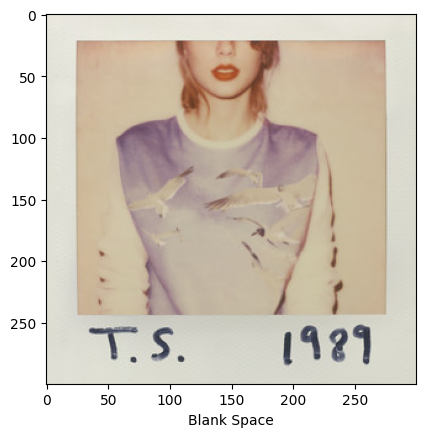

In [220]:
import matplotlib.pyplot as plt
from skimage import io

# musica referencia
nome_musica = 'Taylor Swift - Blank Space'

# id da musica referencia
id = projetion_kmeans\
          .filter(projetion_kmeans.artists_song == nome_musica)\
          .select('id').collect()[0][0]

# requisita as informações do id na API do Spotify
track = sp.track(id)


url = track["album"]["images"][1]["url"]
name = track["name"]

image = io.imread(url)
plt.imshow(image)
plt.xlabel(name, fontsize = 10)
plt.show()

In [221]:
import matplotlib.pyplot as plt
from skimage import io

def visualize_songs(name,url):

    plt.figure(figsize=(15,10))
    columns = 5
    for i, u in enumerate(url):
        ax = plt.subplot(len(url) // columns + 1, columns, i + 1)
        image = io.imread(u)
        plt.imshow(image)
        ax.get_yaxis().set_visible(False)
        plt.xticks(color = 'w', fontsize = 0.1)
        plt.yticks(color = 'w', fontsize = 0.1)
        plt.xlabel(name[i], fontsize = 10)
        plt.tight_layout(h_pad=0.7, w_pad=0)
        plt.subplots_adjust(wspace=None, hspace=None)
        plt.grid(visible=None)
        #plt.axis('off')
    plt.show()

In [223]:
playlist_id = recomendadas.select('id').collect()

name = []
url = []
for i in playlist_id:
    track = sp.track(i[0])
    url.append(track["album"]["images"][1]["url"])
    name.append(track["name"])

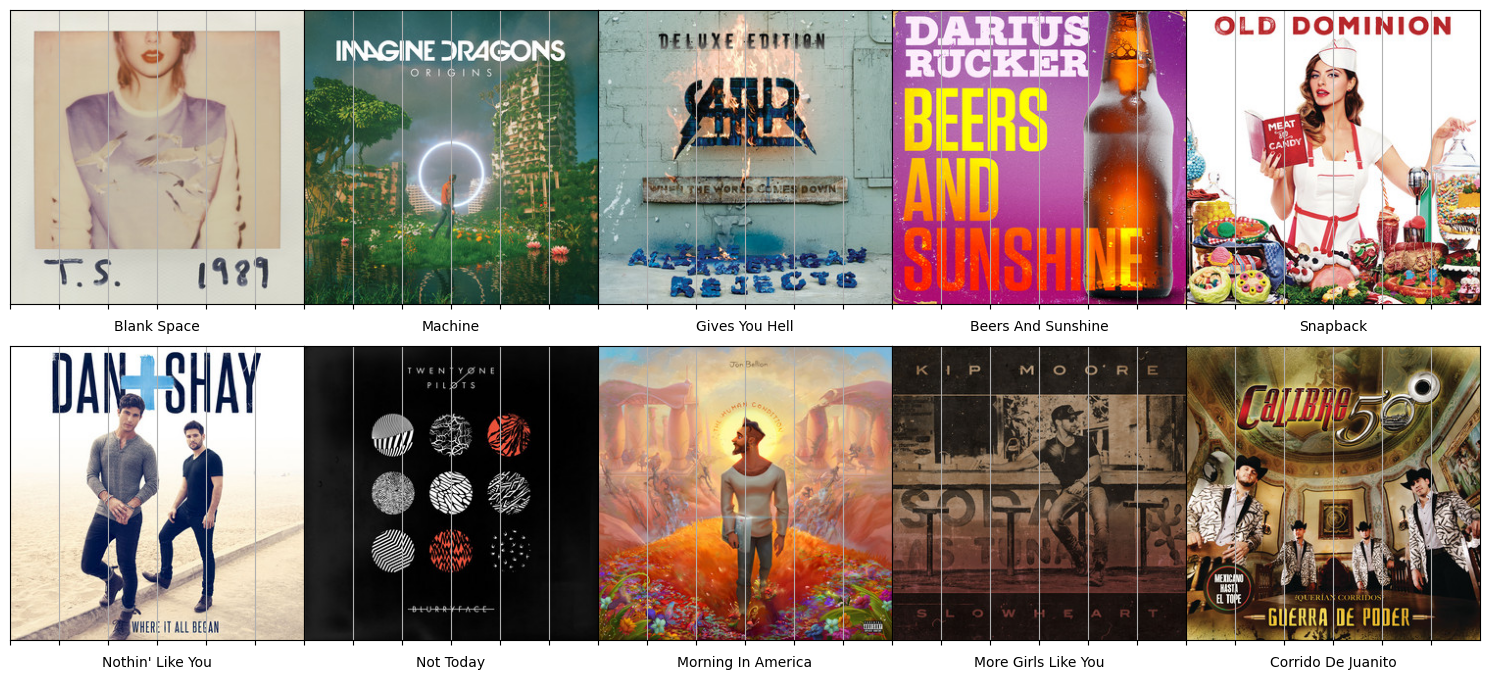

In [224]:
visualize_songs(name,url)

In [227]:
# função anterior editada novamente
def recomendador(nome_musica):

  # Calcula musicas recomendadas
  cluster = projetion_kmeans.filter(projetion_kmeans.artists_song == nome_musica).select('cluster_pca').collect()[0][0]
  musicas_recomendadas = projetion_kmeans.filter(projetion_kmeans.cluster_pca == cluster)\
                                       .select('artists_song', 'id', 'pca_features')
  componenetes_musica = musicas_recomendadas.filter(musicas_recomendadas.artists_song == nome_musica)\
                                          .select('pca_features').collect()[0][0]

  # retorna a distancia das musicas para a musica referencia
  def calcula_distance(value):
    return euclidean(componenetes_musica, value)
  # edita o retorno da função para float
  udf_calcula_distance = f.udf(calcula_distance, FloatType())

  # inclui no df a coluna de distancias
  musicas_recomendadas_dist = musicas_recomendadas.withColumn('Dist', udf_calcula_distance('pca_features'))

  # cria um df de 3 colunas a paertir do df anterior, com as 10 musicas mais proximas da musica referencia
  recomendadas = spark.createDataFrame(musicas_recomendadas_dist.sort('Dist').take(10)).select(['artists_song', 'id', 'Dist'])

  # apresenta as 10 musicas recomendadas
  recomendadas.select('artists_song').show(truncate=False)


  #Pegar informações na API fazendo requisições
  playlist_id = recomendadas.select('id').collect()

  name = []
  url = []
  for i in playlist_id:
      track = sp.track(i[0])
      url.append(track["album"]["images"][1]["url"])
      name.append(track["name"])

  # plotando as capas dos albuns

  plt.figure(figsize=(15,10))
  columns = 5
  for i, u in enumerate(url):
      ax = plt.subplot(len(url) // columns + 1, columns, i + 1)
      image = io.imread(u)
      plt.imshow(image)
      ax.get_yaxis().set_visible(False)
      plt.xticks(color = 'w', fontsize = 0.1)
      plt.yticks(color = 'w', fontsize = 0.1)
      plt.xlabel(name[i], fontsize = 10)
      plt.tight_layout(h_pad=0.7, w_pad=0)
      plt.subplots_adjust(wspace=None, hspace=None)
      plt.grid(visible=None)
      #plt.axis('off')
  plt.show()

+-----------------------------------------+
|artists_song                             |
+-----------------------------------------+
|Taylor Swift - Blank Space               |
|Imagine Dragons - Machine                |
|The All-American Rejects - Gives You Hell|
|Darius Rucker - Beers And Sunshine       |
|Old Dominion - Snapback                  |
|Dan + Shay - Nothin' Like You            |
|Twenty One Pilots - Not Today            |
|Jon Bellion - Morning In America         |
|Kip Moore - More Girls Like You          |
|Calibre 50 - Corrido De Juanito          |
+-----------------------------------------+



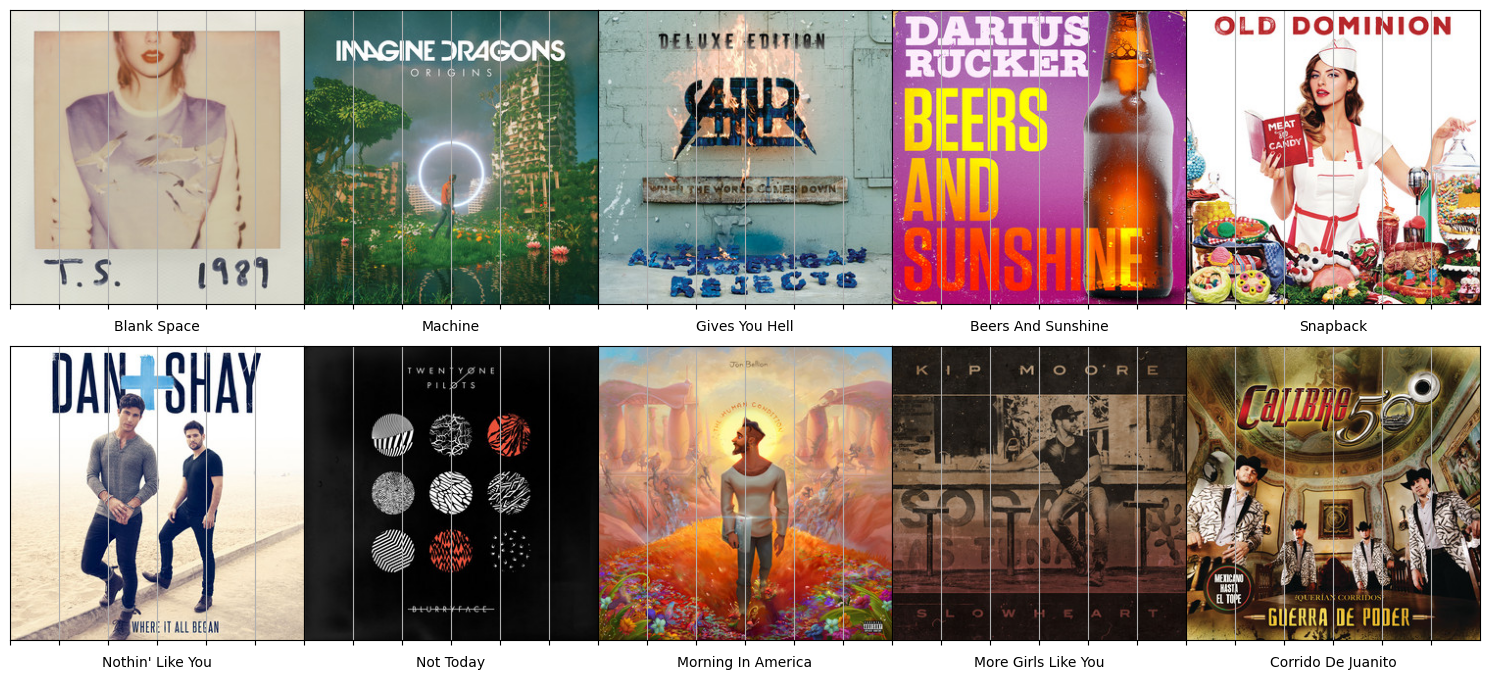

In [228]:
recomendador('Taylor Swift - Blank Space')